<a href="https://colab.research.google.com/github/Dzakiyy-ah/Paddy-Gorontalo-Image-Classification/blob/main/AfterMatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uji Coba Awal

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# import os
# import shutil

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pathlib
data_train = '/content/gdrive/My Drive/images'

In [ ]:
# def AHE(img):
#     img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
#     return img_adapteq

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    # preprocessing_function=AHE
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 4363 images belonging to 5 classes.
Found 1089 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=10,
                    verbose=2)

Epoch 1/10
69/69 - 747s - loss: 0.6668 - accuracy: 0.7465 - val_loss: 0.7144 - val_accuracy: 0.6961 - 747s/epoch - 11s/step
Epoch 2/10
69/69 - 743s - loss: 0.6176 - accuracy: 0.7545 - val_loss: 0.5746 - val_accuracy: 0.7833 - 743s/epoch - 11s/step
Epoch 3/10
69/69 - 727s - loss: 0.6048 - accuracy: 0.7655 - val_loss: 0.5520 - val_accuracy: 0.7860 - 727s/epoch - 11s/step
Epoch 4/10
69/69 - 706s - loss: 0.5236 - accuracy: 0.7942 - val_loss: 0.6718 - val_accuracy: 0.7319 - 706s/epoch - 10s/step
Epoch 5/10
69/69 - 721s - loss: 0.5472 - accuracy: 0.7855 - val_loss: 0.5030 - val_accuracy: 0.8062 - 721s/epoch - 10s/step
Epoch 6/10
69/69 - 713s - loss: 0.4893 - accuracy: 0.8166 - val_loss: 0.5211 - val_accuracy: 0.7796 - 713s/epoch - 10s/step
Epoch 7/10
69/69 - 731s - loss: 0.4339 - accuracy: 0.8347 - val_loss: 0.5877 - val_accuracy: 0.7723 - 731s/epoch - 11s/step
Epoch 8/10
69/69 - 742s - loss: 0.4382 - accuracy: 0.8373 - val_loss: 0.4697 - val_accuracy: 0.8163 - 742s/epoch - 11s/step
Epoch 9/

Saving scirpophaga-incertulas7.jpg to scirpophaga-incertulas7 (1).jpg
1/1 [==============================] - 0s 389ms/step
Normal =0%
Stem-Borer =99%
Leaffolder =0%
[[0.00190085 0.99809915 0.         0.         0.        ]]


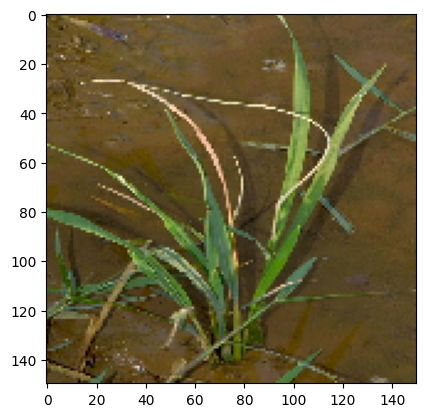

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

def print_classes(classes):
    print(f"Normal ={int(classes[0] * 100)}%")
    print(f"Stem-Borer ={int(classes[1] * 100)}%")
    print(f"Leaffolder ={int(classes[2] * 100)}%")
    # print(f"Bacterial-Leaf-Blight ={int(classes[4] * 100)}%")
    # print(f"Blast ={int(classes[5] * 100)}%")

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

print_classes(classes[0])
print(classes)

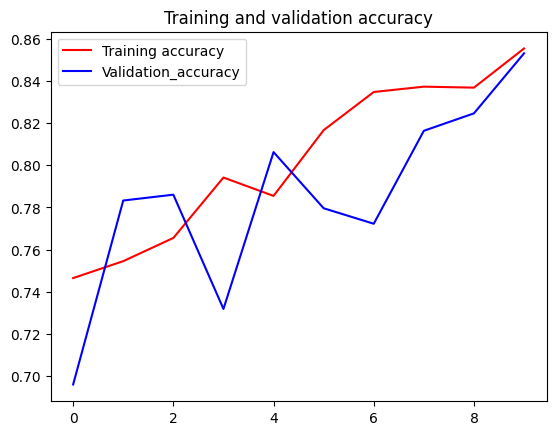

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot the result

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation_accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# Skenario 1

## Resize Image


### 64x64 px

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    # preprocessing_function=AHE
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(64,64),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(64,64),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 4363 images belonging to 5 classes.
Found 1089 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=10,
                    verbose=2)

Epoch 1/10
69/69 - 233s - loss: 0.8594 - accuracy: 0.6631 - val_loss: 0.9771 - val_accuracy: 0.6070 - 233s/epoch - 3s/step
Epoch 2/10
69/69 - 234s - loss: 0.7992 - accuracy: 0.6922 - val_loss: 0.6862 - val_accuracy: 0.7438 - 234s/epoch - 3s/step
Epoch 3/10
69/69 - 232s - loss: 0.7454 - accuracy: 0.7135 - val_loss: 0.7374 - val_accuracy: 0.7163 - 232s/epoch - 3s/step
Epoch 4/10
69/69 - 222s - loss: 0.6882 - accuracy: 0.7321 - val_loss: 0.7226 - val_accuracy: 0.7199 - 222s/epoch - 3s/step
Epoch 5/10
69/69 - 232s - loss: 0.6868 - accuracy: 0.7332 - val_loss: 0.5702 - val_accuracy: 0.7888 - 232s/epoch - 3s/step
Epoch 6/10
69/69 - 223s - loss: 0.6041 - accuracy: 0.7660 - val_loss: 0.5908 - val_accuracy: 0.7594 - 223s/epoch - 3s/step
Epoch 7/10
69/69 - 227s - loss: 0.5376 - accuracy: 0.7864 - val_loss: 0.5443 - val_accuracy: 0.8154 - 227s/epoch - 3s/step
Epoch 8/10
69/69 - 217s - loss: 0.5898 - accuracy: 0.7770 - val_loss: 0.6273 - val_accuracy: 0.7539 - 217s/epoch - 3s/step
Epoch 9/10
69/69

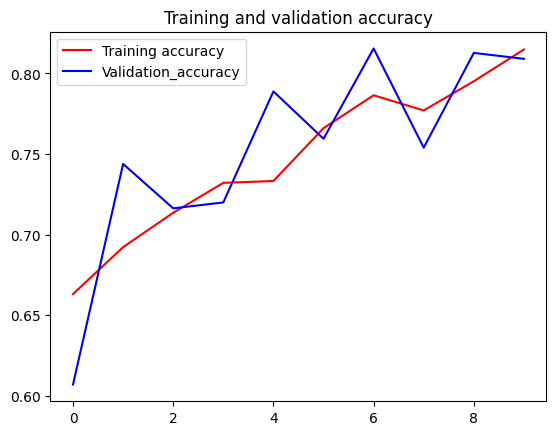

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot the result

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation_accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving scirpophaga-incertulas7.jpg to scirpophaga-incertulas7 (2).jpg
1/1 [==============================] - 0s 39ms/step
Normal =0%
Stem-Borer =0%
Leaffolder =0%
Bacterial-Leaf-Blight =0%
Blast =100%
[[0. 0. 0. 0. 1.]]


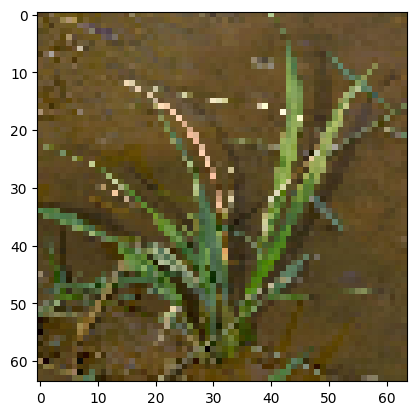

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

def print_classes(classes):
    print(f"Normal ={int(classes[0] * 100)}%")
    print(f"Stem-Borer ={int(classes[1] * 100)}%")
    print(f"Leaffolder ={int(classes[2] * 100)}%")
    print(f"Bacterial-Leaf-Blight ={int(classes[3] * 100)}%")
    print(f"Blast ={int(classes[4] * 100)}%")

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(64,64))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

print_classes(classes[0])
print(classes)

### 128x128 px

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    # preprocessing_function=AHE
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(128,128),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(128,128),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 4363 images belonging to 5 classes.
Found 1089 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=10,
                    verbose=2)

Epoch 1/10
69/69 - 621s - loss: 1.5563 - accuracy: 0.4543 - val_loss: 1.1127 - val_accuracy: 0.5482 - 621s/epoch - 9s/step
Epoch 2/10
69/69 - 611s - loss: 1.0673 - accuracy: 0.5801 - val_loss: 0.9766 - val_accuracy: 0.6208 - 611s/epoch - 9s/step
Epoch 3/10
69/69 - 576s - loss: 0.9260 - accuracy: 0.6429 - val_loss: 0.8601 - val_accuracy: 0.6768 - 576s/epoch - 8s/step
Epoch 4/10
69/69 - 566s - loss: 0.8198 - accuracy: 0.6826 - val_loss: 0.8328 - val_accuracy: 0.6722 - 566s/epoch - 8s/step
Epoch 5/10
69/69 - 552s - loss: 0.7777 - accuracy: 0.7018 - val_loss: 0.7474 - val_accuracy: 0.7135 - 552s/epoch - 8s/step
Epoch 6/10
69/69 - 582s - loss: 0.7067 - accuracy: 0.7282 - val_loss: 0.7288 - val_accuracy: 0.7043 - 582s/epoch - 8s/step
Epoch 7/10
69/69 - 548s - loss: 0.6503 - accuracy: 0.7520 - val_loss: 0.6772 - val_accuracy: 0.7585 - 548s/epoch - 8s/step
Epoch 8/10
69/69 - 525s - loss: 0.6290 - accuracy: 0.7568 - val_loss: 0.7008 - val_accuracy: 0.7420 - 525s/epoch - 8s/step
Epoch 9/10
69/69

### 224x224 px



In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    # preprocessing_function=AHE
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 4363 images belonging to 5 classes.
Found 1089 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    verbose=2)

Epoch 1/20
69/69 - 1862s - loss: 2.4671 - accuracy: 0.4071 - val_loss: 1.2351 - val_accuracy: 0.4876 - 1862s/epoch - 27s/step
Epoch 2/20
69/69 - 1380s - loss: 1.1833 - accuracy: 0.5226 - val_loss: 1.0438 - val_accuracy: 0.6097 - 1380s/epoch - 20s/step
Epoch 3/20
69/69 - 1390s - loss: 1.0364 - accuracy: 0.5881 - val_loss: 0.9194 - val_accuracy: 0.6602 - 1390s/epoch - 20s/step
Epoch 4/20
69/69 - 1380s - loss: 0.9604 - accuracy: 0.6280 - val_loss: 0.8802 - val_accuracy: 0.6933 - 1380s/epoch - 20s/step
Epoch 5/20
69/69 - 1391s - loss: 0.9377 - accuracy: 0.6473 - val_loss: 0.9191 - val_accuracy: 0.6639 - 1391s/epoch - 20s/step
Epoch 6/20
69/69 - 1381s - loss: 0.8668 - accuracy: 0.6654 - val_loss: 0.7907 - val_accuracy: 0.7245 - 1381s/epoch - 20s/step
Epoch 7/20
69/69 - 1364s - loss: 0.8409 - accuracy: 0.6766 - val_loss: 0.7476 - val_accuracy: 0.7062 - 1364s/epoch - 20s/step
Epoch 8/20
69/69 - 1326s - loss: 0.7847 - accuracy: 0.7025 - val_loss: 0.7480 - val_accuracy: 0.7208 - 1326s/epoch - 1

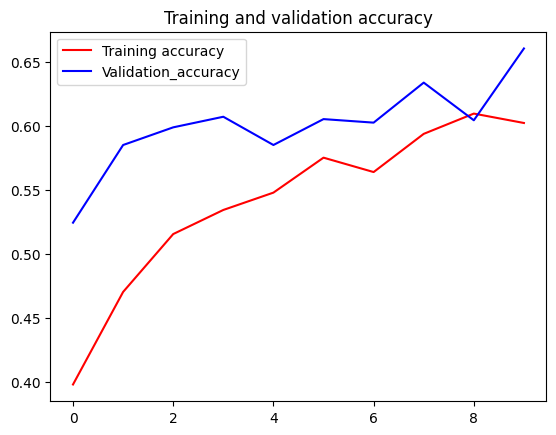

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot the result

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation_accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving scirpophaga-incertulas7.jpg to scirpophaga-incertulas7 (1).jpg
1/1 [==============================] - 0s 456ms/step
Normal =100%
Stem-Borer =0%
Leaffolder =0%
Bacterial-Leaf-Blight =0%
Blast =0%
[[1. 0. 0. 0. 0.]]


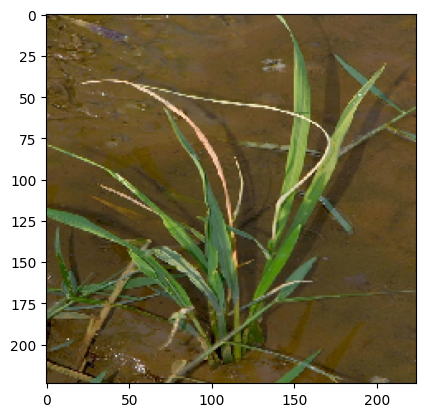

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

def print_classes(classes):
    print(f"Normal ={int(classes[0] * 100)}%")
    print(f"Stem-Borer ={int(classes[1] * 100)}%")
    print(f"Leaffolder ={int(classes[2] * 100)}%")
    print(f"Bacterial-Leaf-Blight ={int(classes[3] * 100)}%")
    print(f"Blast ={int(classes[4] * 100)}%")

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224,224))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

print_classes(classes[0])
print(classes)

# Skenario 2 : Optimizer = Adam & SGD

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    # preprocessing_function=AHE
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(128,128),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(128,128),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 4363 images belonging to 5 classes.
Found 1089 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
model.compile(optimizer=tf.optimizers.SGD(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=10,
                    verbose=2)

Epoch 1/10
69/69 - 1288s - loss: 1.4152 - accuracy: 0.3725 - val_loss: 1.2906 - val_accuracy: 0.5106 - 1288s/epoch - 19s/step
Epoch 2/10
69/69 - 524s - loss: 1.2845 - accuracy: 0.4625 - val_loss: 1.1758 - val_accuracy: 0.5418 - 524s/epoch - 8s/step
Epoch 3/10
69/69 - 518s - loss: 1.2041 - accuracy: 0.5205 - val_loss: 1.1283 - val_accuracy: 0.5500 - 518s/epoch - 8s/step
Epoch 4/10
69/69 - 520s - loss: 1.1561 - accuracy: 0.5363 - val_loss: 1.1167 - val_accuracy: 0.5601 - 520s/epoch - 8s/step
Epoch 5/10
69/69 - 516s - loss: 1.1252 - accuracy: 0.5478 - val_loss: 1.0276 - val_accuracy: 0.5859 - 516s/epoch - 7s/step
Epoch 6/10
69/69 - 527s - loss: 1.0910 - accuracy: 0.5657 - val_loss: 1.0422 - val_accuracy: 0.5556 - 527s/epoch - 8s/step
Epoch 7/10
69/69 - 509s - loss: 1.0633 - accuracy: 0.5755 - val_loss: 0.9860 - val_accuracy: 0.5969 - 509s/epoch - 7s/step
Epoch 8/10
69/69 - 483s - loss: 1.0170 - accuracy: 0.5987 - val_loss: 0.9292 - val_accuracy: 0.6400 - 483s/epoch - 7s/step
Epoch 9/10
69

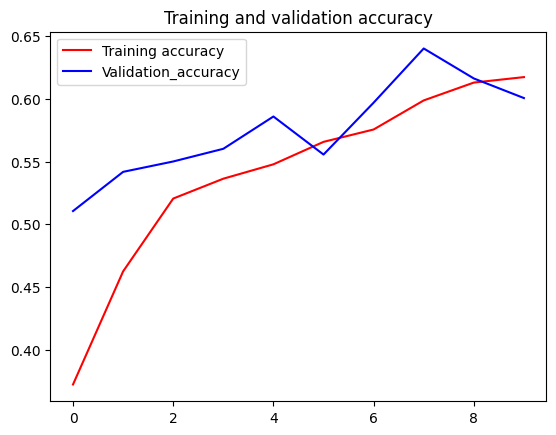

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot the result

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation_accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving scirpophaga-incertulas7.jpg to scirpophaga-incertulas7.jpg
1/1 [==============================] - 0s 312ms/step
Normal =100%
Stem-Borer =0%
Leaffolder =0%
Bacterial-Leaf-Blight =0%
Blast =0%
[[1. 0. 0. 0. 0.]]


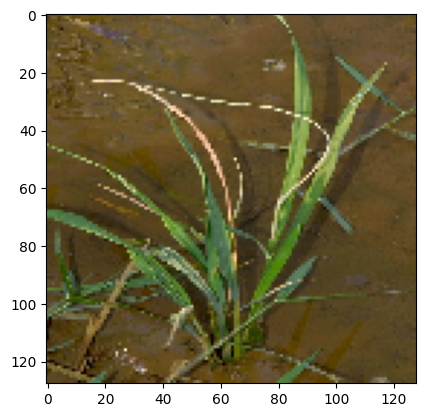

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

def print_classes(classes):
    print(f"Normal ={int(classes[0] * 100)}%")
    print(f"Stem-Borer ={int(classes[1] * 100)}%")
    print(f"Leaffolder ={int(classes[2] * 100)}%")
    print(f"Bacterial-Leaf-Blight ={int(classes[3] * 100)}%")
    print(f"Blast ={int(classes[4] * 100)}%")

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(128,128))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

print_classes(classes[0])
print(classes)

# Skenario 3 : Learning Rate = 0,001; 0,0001

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    # preprocessing_function=AHE
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(128,128),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(128,128),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 4363 images belonging to 5 classes.
Found 1089 images belonging to 5 classes.


In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=10,
                    verbose=2)

Epoch 1/10
69/69 - 563s - loss: 1.7285 - accuracy: 0.4421 - val_loss: 1.1008 - val_accuracy: 0.5914 - 563s/epoch - 8s/step
Epoch 2/10
69/69 - 551s - loss: 1.0868 - accuracy: 0.5702 - val_loss: 0.9729 - val_accuracy: 0.6309 - 551s/epoch - 8s/step
Epoch 3/10
69/69 - 532s - loss: 0.9288 - accuracy: 0.6434 - val_loss: 0.9036 - val_accuracy: 0.6419 - 532s/epoch - 8s/step
Epoch 4/10
69/69 - 579s - loss: 0.8390 - accuracy: 0.6688 - val_loss: 0.7711 - val_accuracy: 0.6749 - 579s/epoch - 8s/step
Epoch 5/10
69/69 - 528s - loss: 0.7822 - accuracy: 0.6965 - val_loss: 0.7538 - val_accuracy: 0.7098 - 528s/epoch - 8s/step
Epoch 6/10
69/69 - 533s - loss: 0.7643 - accuracy: 0.7046 - val_loss: 0.7234 - val_accuracy: 0.7264 - 533s/epoch - 8s/step
Epoch 7/10
69/69 - 561s - loss: 0.6981 - accuracy: 0.7357 - val_loss: 0.7462 - val_accuracy: 0.6942 - 561s/epoch - 8s/step
Epoch 8/10
69/69 - 559s - loss: 0.6574 - accuracy: 0.7474 - val_loss: 0.6838 - val_accuracy: 0.7227 - 559s/epoch - 8s/step
Epoch 9/10
69/69

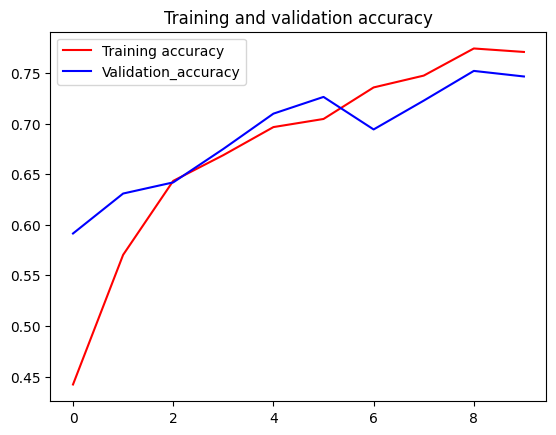

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot the result

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation_accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    # preprocessing_function=AHE
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(128,128),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(128,128),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 4363 images belonging to 5 classes.
Found 1089 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=10,
                    verbose=2)

Epoch 1/10
69/69 - 1663s - loss: 1.2375 - accuracy: 0.4884 - val_loss: 1.0448 - val_accuracy: 0.5978 - 1663s/epoch - 24s/step
Epoch 2/10
69/69 - 530s - loss: 1.0600 - accuracy: 0.5845 - val_loss: 0.9081 - val_accuracy: 0.6575 - 530s/epoch - 8s/step
Epoch 3/10
69/69 - 519s - loss: 0.9624 - accuracy: 0.6266 - val_loss: 0.8751 - val_accuracy: 0.6446 - 519s/epoch - 8s/step
Epoch 4/10
69/69 - 483s - loss: 0.8632 - accuracy: 0.6610 - val_loss: 0.7841 - val_accuracy: 0.6850 - 483s/epoch - 7s/step
Epoch 5/10
69/69 - 479s - loss: 0.8035 - accuracy: 0.6798 - val_loss: 0.7498 - val_accuracy: 0.7236 - 479s/epoch - 7s/step
Epoch 6/10
69/69 - 506s - loss: 0.7503 - accuracy: 0.7064 - val_loss: 0.7209 - val_accuracy: 0.7107 - 506s/epoch - 7s/step
Epoch 7/10
69/69 - 506s - loss: 0.7150 - accuracy: 0.7172 - val_loss: 0.6879 - val_accuracy: 0.7227 - 506s/epoch - 7s/step
Epoch 8/10
69/69 - 513s - loss: 0.6812 - accuracy: 0.7360 - val_loss: 0.6110 - val_accuracy: 0.7686 - 513s/epoch - 7s/step
Epoch 9/10
69

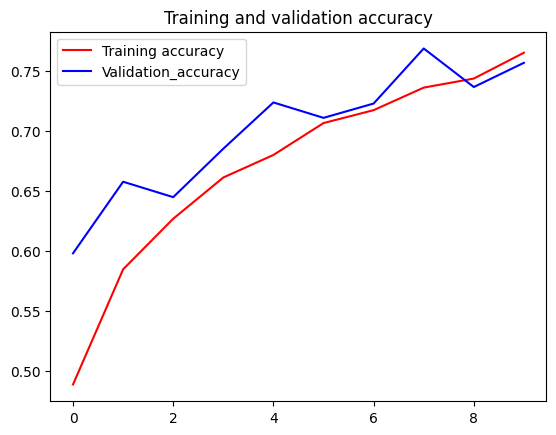

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot the result

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation_accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# Skenario 4 : Batch Size = 32, 64, 128

In [ ]:
# def AHE(img):
#     img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
#     return img_adapteq

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    # preprocessing_function=AHE
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4363 images belonging to 5 classes.
Found 1089 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=10,
                    verbose=2)

Epoch 1/10
137/137 - 2384s - loss: 1.3056 - accuracy: 0.5166 - val_loss: 1.0275 - val_accuracy: 0.6134 - 2384s/epoch - 17s/step
Epoch 2/10
137/137 - 538s - loss: 0.9420 - accuracy: 0.6340 - val_loss: 0.8223 - val_accuracy: 0.6685 - 538s/epoch - 4s/step
Epoch 3/10
137/137 - 570s - loss: 0.8574 - accuracy: 0.6562 - val_loss: 0.7593 - val_accuracy: 0.7071 - 570s/epoch - 4s/step
Epoch 4/10
137/137 - 533s - loss: 0.7644 - accuracy: 0.6988 - val_loss: 0.6639 - val_accuracy: 0.7456 - 533s/epoch - 4s/step
Epoch 5/10
137/137 - 560s - loss: 0.7241 - accuracy: 0.7204 - val_loss: 0.7146 - val_accuracy: 0.7365 - 560s/epoch - 4s/step
Epoch 6/10
137/137 - 564s - loss: 0.6539 - accuracy: 0.7483 - val_loss: 0.5906 - val_accuracy: 0.7824 - 564s/epoch - 4s/step
Epoch 7/10
137/137 - 574s - loss: 0.6018 - accuracy: 0.7685 - val_loss: 0.5751 - val_accuracy: 0.7833 - 574s/epoch - 4s/step
Epoch 8/10
137/137 - 575s - loss: 0.5756 - accuracy: 0.7818 - val_loss: 0.5999 - val_accuracy: 0.7658 - 575s/epoch - 4s/st

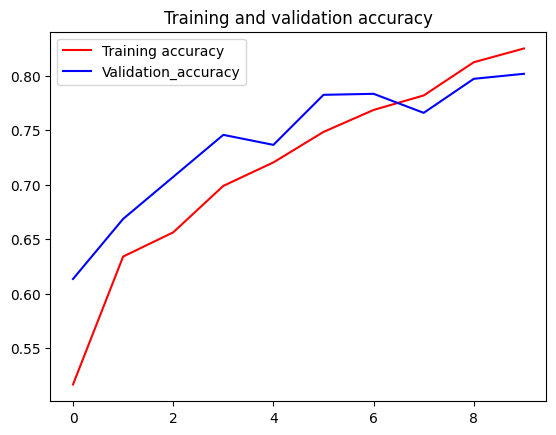

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot the result

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation_accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving scirpophaga-incertulas7.jpg to scirpophaga-incertulas7.jpg
1/1 [==============================] - 0s 322ms/step
Normal =0%
Stem-Borer =100%
Leaffolder =0%
Bacterial-Leaf-Blight =0%
Blast =0%
[[0. 1. 0. 0. 0.]]


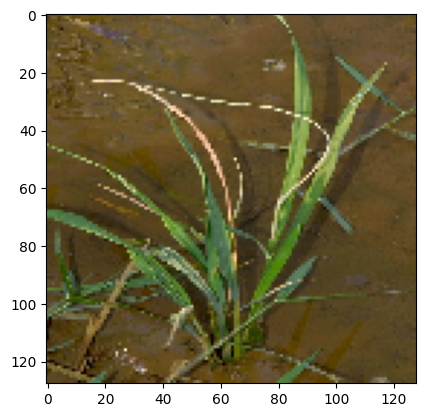

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

def print_classes(classes):
    print(f"Normal ={int(classes[0] * 100)}%")
    print(f"Stem-Borer ={int(classes[1] * 100)}%")
    print(f"Leaffolder ={int(classes[2] * 100)}%")
    print(f"Bacterial-Leaf-Blight ={int(classes[3] * 100)}%")
    print(f"Blast ={int(classes[4] * 100)}%")

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(128,128))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

print_classes(classes[0])
print(classes)

Saving 1000_F_412828920_RfWxhgn00dXmnssHeFD6rvLcNbRatszA.jpg to 1000_F_412828920_RfWxhgn00dXmnssHeFD6rvLcNbRatszA.jpg
1/1 [==============================] - 0s 77ms/step
Normal =0%
Stem-Borer =0%
Leaffolder =0%
Bacterial-Leaf-Blight =0%
Blast =100%
[[0. 0. 0. 0. 1.]]


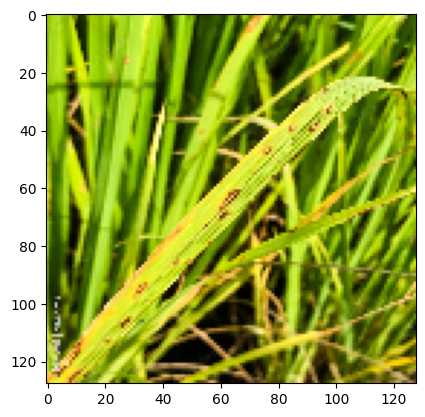

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

def print_classes(classes):
    print(f"Normal ={int(classes[0] * 100)}%")
    print(f"Stem-Borer ={int(classes[1] * 100)}%")
    print(f"Leaffolder ={int(classes[2] * 100)}%")
    print(f"Bacterial-Leaf-Blight ={int(classes[3] * 100)}%")
    print(f"Blast ={int(classes[4] * 100)}%")

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(128,128))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

print_classes(classes[0])
print(classes)

Saving hama-putih-palsu-pada-tanaman-padi-29.jpeg to hama-putih-palsu-pada-tanaman-padi-29.jpeg
1/1 [==============================] - 0s 65ms/step
Normal =0%
Stem-Borer =0%
Leaffolder =0%
Bacterial-Leaf-Blight =0%
Blast =100%
[[0. 0. 0. 0. 1.]]


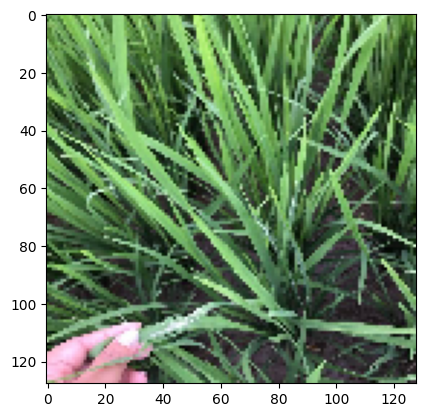

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

def print_classes(classes):
    print(f"Normal ={int(classes[0] * 100)}%")
    print(f"Stem-Borer ={int(classes[1] * 100)}%")
    print(f"Leaffolder ={int(classes[2] * 100)}%")
    print(f"Bacterial-Leaf-Blight ={int(classes[3] * 100)}%")
    print(f"Blast ={int(classes[4] * 100)}%")

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(128,128))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

print_classes(classes[0])
print(classes)

In [ ]:
from skimage import color, util, exposure
def AHE(img):
    img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
    return img_adapteq

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    preprocessing_function=AHE
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4363 images belonging to 5 classes.
Found 1089 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=10,
                    verbose=2)

ValueError: Images of type float must be between -1 and 1.

# Skenario 5 : Epoch = 10,20,30